# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [3]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.20.0


### Creating data to view and fit

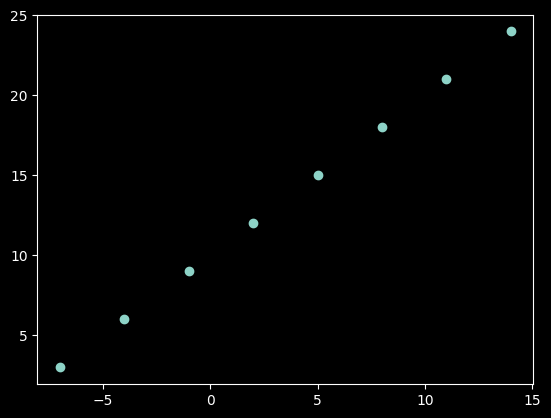

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X = tf.cast(X, dtype= tf.float32)
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y = tf.cast(y, dtype= tf.float32)

# Visualize it
plt.scatter(X,y)

In [3]:
y == X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

In [4]:
# Create a tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [6]:
X[1], y[1]


(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape #type:ignore
output_shape = y[0].shape #type:ignore
input_shape, output_shape

(TensorShape([]), TensorShape([]))

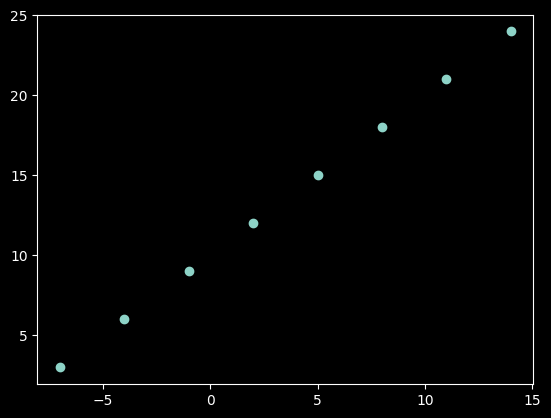

In [11]:
plt.scatter(X,y) #type:ignore

## Steps in modeling with TensorFlow

1. **Creating a model**
    - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**
    - define the loss function (in other words the function which tells our model how wrong it is)
    - define the optimizer (tells our model how to improve the patterns its learning)
    - define the metrics (what we can use to interpret the performance of our model )
3. **Fitting a model**
    - letting the model try to find patterns between X and Y (features and labels)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae -> mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 18.8313 - mae: 18.8313


In [13]:
# Checkout x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
predict = tf.constant([17.0])
y_pred = model.predict(predict)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[-18.791746]], dtype=float32)

### Improving our model
We can improve our mode, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the numbers of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [15]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.050),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - loss: 13.4287 - mae: 13.4287
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.1673 - mae: 6.1673
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 15.2118 - mae: 15.2118
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.8895 - mae: 10.8895
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.6104 - mae: 4.6104
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.4809 - mae: 7.4809
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.3184 - mae: 8.3184
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.5791 - mae: 7.5791
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.9463 - mae: 5.9463
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.7733 - mae: 3.7733
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.0142 - mae: 5.0142
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.8266 - mae: 4.8266
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [16]:
#remind ourselves the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
predict = tf.constant([17.0])
model.predict(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[32.062084]], dtype=float32)

In [18]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step - loss: 14.4993 - mae: 14.4993
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.7923 - mae: 13.7923
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.0824 - mae: 13.0824
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.3676 - mae: 12.3676
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.6465 - mae: 11.6465
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.9166 - mae: 10.9166
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.1757 - mae: 10.1757
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.4216 - mae: 9.4216
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.6524 - mae: 8.6524
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.8658 - mae: 7.8658
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.0593 - mae: 7.0593
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.5729 - mae: 6.5729
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [19]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
prd = tf.constant([17])
model.predict(prd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[26.462868]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll through when building neural networks is:


`Build a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it -> tweak a model` -> `fit it -> evaluate it...`



## When it comes evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize,"

### It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does it look like?
* The training of a model - how does a model preform while it learns?
* The predictions of the model - how do the predictions of a model line up against the grand truth (the original labels) ?

In [4]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [5]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

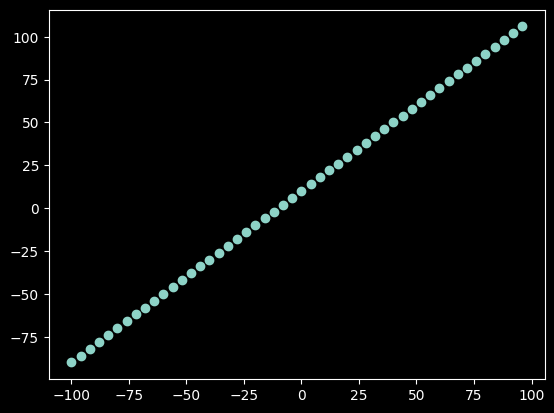

In [23]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...


* **Training set** - the model learns from this data, which is
typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is
typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test
what is has learned, this set is typically 10-15% of the total
data available.

In [24]:
# Check the length of how many samples we have
len(X)

50

In [6]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data
Now we're got our data in training and test sets... let's visualize it again

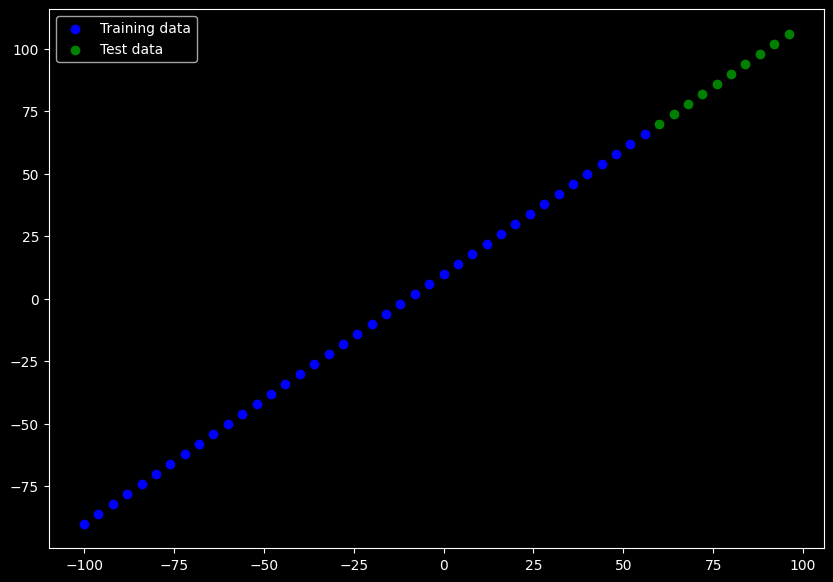

In [26]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label= "Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label= "Test data")
plt.legend()

In [27]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

## Fit the model.
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],
    name="model_1")

# Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

C:\Users\56768\Desktop\ZTM - Tensorflow\tensorflow-env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns)
the model can update as it trains.
* Non-trainable params - these parameters aren't updated
during training (this is typical when you bring in already
learn patterns or parameters from other models during
**transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable
parameters within a layer, check out MIT's introduction to
deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [32]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.4013 - mae: 37.4013 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.7176 - mae: 28.7176
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25.1951 - mae: 25.1951
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.9114 - mae: 15.9114
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.8648 - mae: 18.8648
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.5589 - mae: 13.5589
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.0988 - mae: 15.0988
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.4914 - mae: 15.4914
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.7332 - mae: 11.7332
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.0967 - mae: 15.0967
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.5790 - mae: 11.5790
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.9393 - mae: 14.9393
Epoch 13/100
2/2 ━━━━━━━

In [33]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

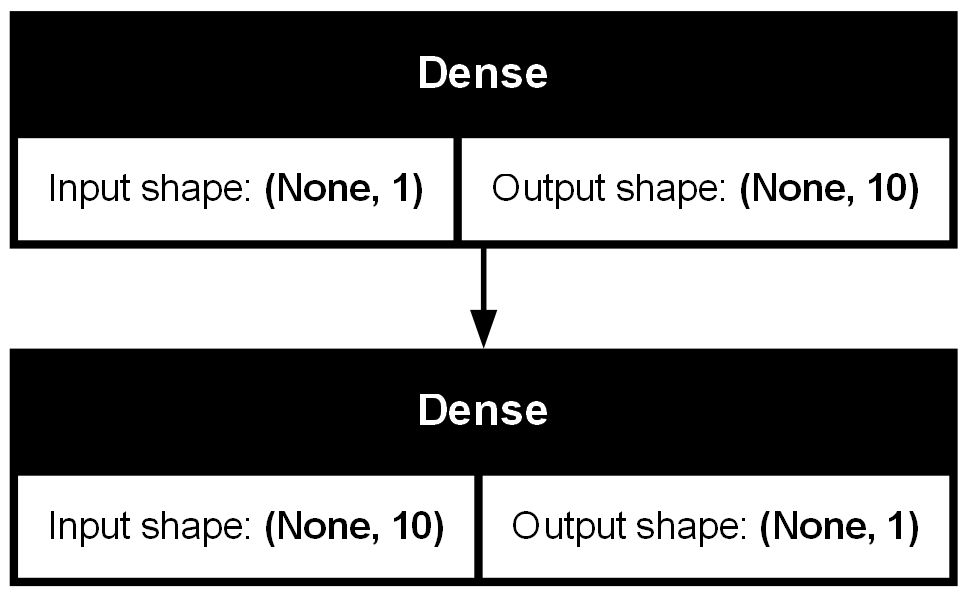

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of "y_test" or "y_true" versus "y_pred" (ground truth versus your model's predictions)

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[42.57324 ],
       [45.30175 ],
       [48.030266],
       [50.758778],
       [53.48729 ],
       [56.2158  ],
       [58.94432 ],
       [61.67283 ],
       [64.401344],
       [67.129845]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🗝️ **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [11]:
# Let's create a plotting function
y_pred = None
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """
    Plots training data test data and compares predictions to ground truth labels.
    """

    # plot the prediction data in blue
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = "b", label= "Training data")

    # plot the testing data
    plt.scatter(test_data, test_labels, c = "g", label= "Test data")


    #Plot model's predictions in red
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()


In [ ]:
plot_predictions(predictions = y_pred)

### These are my codes to improve predictions

In [42]:
# let's create a better model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])


model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 44.6371 - mae: 44.6371 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.0961 - mae: 44.0961
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.5592 - mae: 43.5592
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.0255 - mae: 43.0255
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.4949 - mae: 42.4949
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.9668 - mae: 41.9668
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.4967 - mae: 41.4967
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.2321 - mae: 41.2321
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.9448 - mae: 40.9448
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.6403 - mae: 40.6403
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40.3227 - mae: 40.3227
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.9964 - mae: 39.9964
Epoch 13/200
2/2 ━━━━━━━

In [45]:
y_pred = model.predict(y_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[ 85.952805],
       [ 90.655136],
       [ 95.357475],
       [100.059814],
       [104.76214 ],
       [109.464485],
       [114.16682 ],
       [118.86914 ],
       [123.57148 ],
       [128.27383 ]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

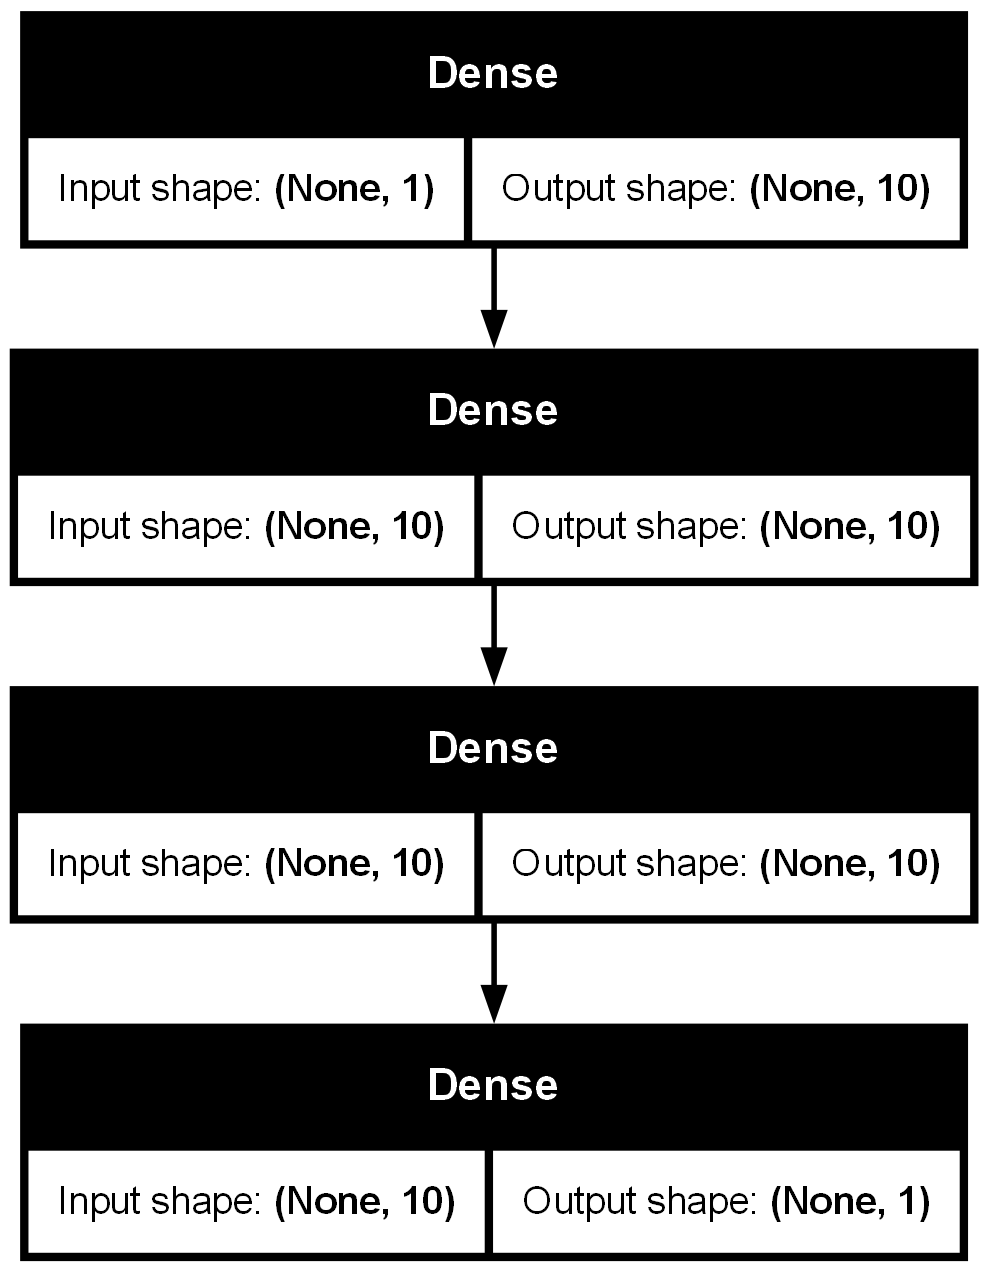

In [47]:
plot_model(model, show_shapes=1)

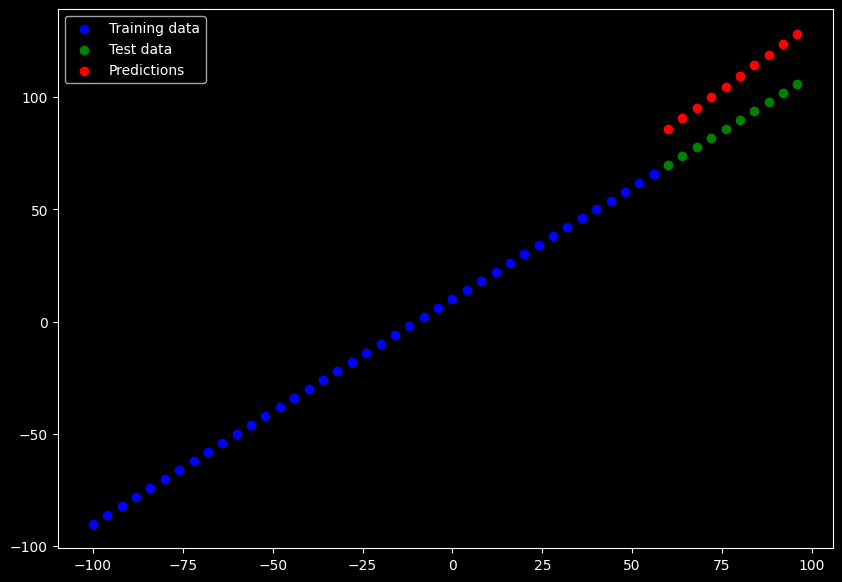

In [48]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our models predictions with regression evaluation metrics

Alongside visualizations, evaluation metrics are your alternative best option for evaluating your model.
Depending on the problem you're working on, different models have different evaluation metrics.
Two of the main metrics used for regression problems are:
- **Mean absolute error (MAE)** - the mean difference between each of the predictions.
- **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [49]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 7.3575 - mae: 7.3575


[7.357470512390137, 7.357470512390137]

In [50]:
# Calculate the mean squared error

In [51]:
tf.keras.metrics.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=369.38824462890625>

In [16]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return tf.keras.metrics.MSE(y_true, tf.squeeze(y_pred))

`Build a model` -> `fit it -> evaluate it -> tweak it` -> `fit it -> evaluate it -> tweak it` -> `fit it -> evaluate it ...`

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and
labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


**Build `model_1`**

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# Compile the model
model_1.compile(loss = tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
X_train_expanded = tf.expand_dims(X_train, axis=-1)
model_1.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1815 - mae: 9.1815 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.3092 - mae: 10.3092
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9421 - mae: 9.9421  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3805 - mae: 11.3805
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9086 - mae: 8.9086
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.0180 - mae: 10.0180
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.5101 - mae: 11.5101
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9845 - mae: 8.9845
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0938 - mae: 10.0938
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.6588 - mae: 11.6588
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.5430 - mae: 12.5430
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3327 - mae: 8.3327
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


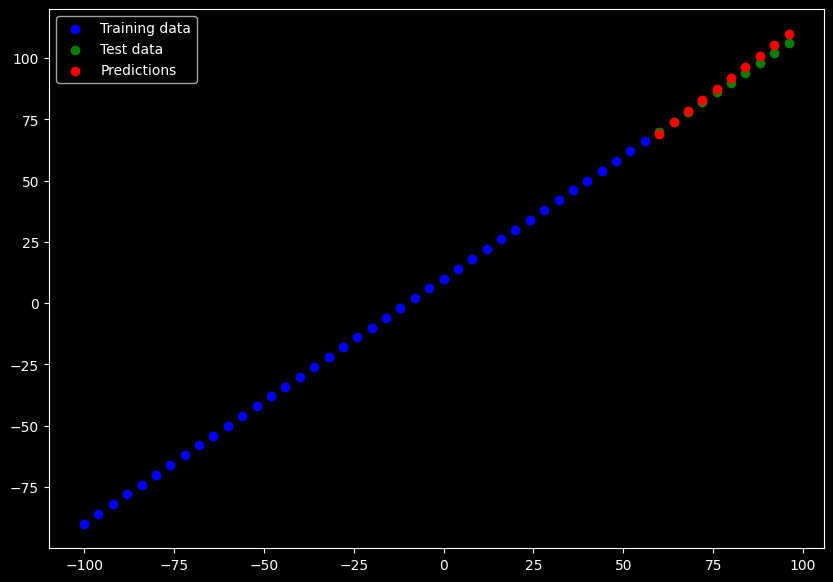

In [54]:
# Make and plot the predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions= y_pred_1)

In [55]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=int32, numpy=14>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.699202537536621>)

 **Build `mdoel_2`** with **your own codes**
- 2 dense layers, trained for 100 epochs

In [8]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["mae"])


X_train_expanded = tf.expand_dims(X_train, axis=-1)
model_2.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.6829 - mae: 11.6829 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.3468 - mae: 11.3468
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9550 - mae: 10.9550
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6425 - mae: 10.6425
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.3650 - mae: 10.3650
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0277 - mae: 10.0277
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7599 - mae: 9.7599
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.4181 - mae: 9.4181
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1565 - mae: 9.1565
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.8970 - mae: 8.8970
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5955 - mae: 8.5955
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3104 - mae: 8.3104
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


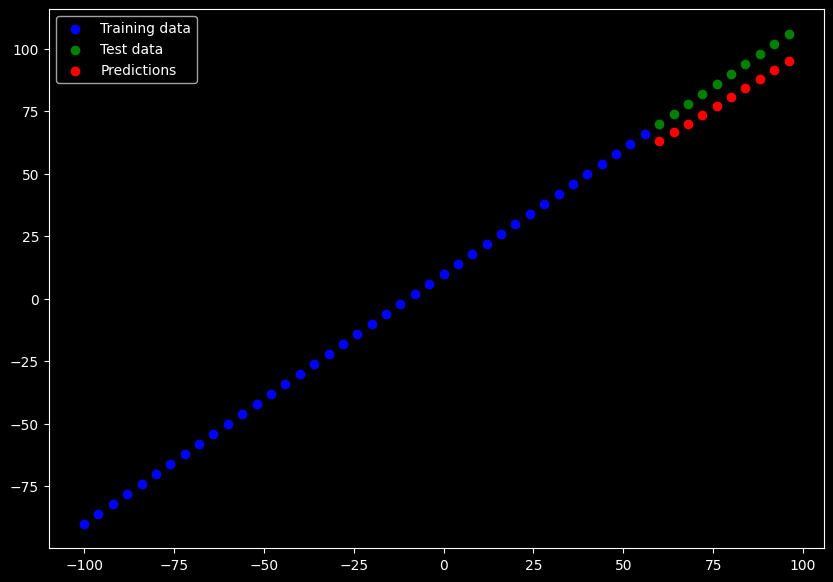

In [14]:
y_pred_2 = model_2.predict(y_test)
plot_predictions(predictions = y_pred_2)

In [17]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2 # My code result

(<tf.Tensor: shape=(), dtype=int32, numpy=14>,
 <tf.Tensor: shape=(), dtype=float32, numpy=83.18475341796875>)

**Build `mdoel_2`** with **course codes**
- 2 dense layers, trained for 100 epochs

In [76]:
tf.random.set_seed(42)

model_2_c = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_2_c.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["mae"])

model_2_c.fit(X_train_expanded, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 48.1298 - mae: 48.1298 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47.5416 - mae: 47.5416
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.9550 - mae: 46.9550
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 46.3691 - mae: 46.3691
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.7839 - mae: 45.7839
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.1995 - mae: 45.1995
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.6158 - mae: 44.6158
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44.0328 - mae: 44.0328
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.4506 - mae: 43.4506
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 42.8691 - mae: 42.8691
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 42.2883 - mae: 42.2883
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 41.7081 - mae: 41.7081
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


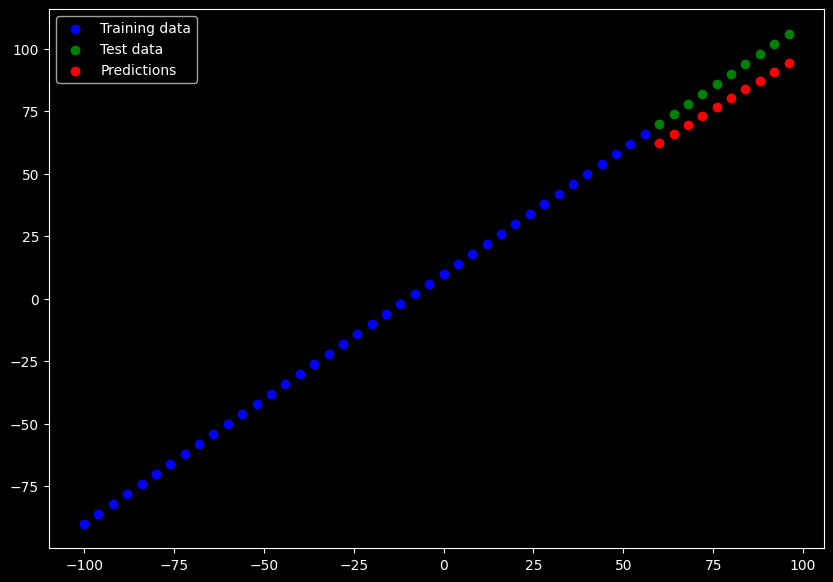

In [77]:
# Make and plot predictions of
y_pred_2_c = model_2_c.predict(y_test)
plot_predictions(predictions = y_pred_2_c)


In [61]:
# Calculate model_2 evaluation metrics
mae_2_c = mae(y_test, y_pred_2_c)
mse_2_c = mse(y_test, y_pred_2_c)
mae_2_c, mse_2_c # course code result

(<tf.Tensor: shape=(), dtype=int32, numpy=31>,
 <tf.Tensor: shape=(), dtype=float32, numpy=950.2518310546875>)

**build `model_3`**
* 2 layers, trained for 500 epochs

In [78]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["mae"])

model_3.fit(X_train_expanded, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.7825 - mae: 35.7825 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.6807 - mae: 24.6807
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.5230 - mae: 23.5230
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.5343 - mae: 15.5343
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.7706 - mae: 18.7706
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.1118 - mae: 14.1118
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.0328 - mae: 15.0328
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.5722 - mae: 15.5722
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.1877 - mae: 12.1877
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.7269 - mae: 14.7269
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.5419 - mae: 15.5419
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.3140 - mae: 12.3140
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


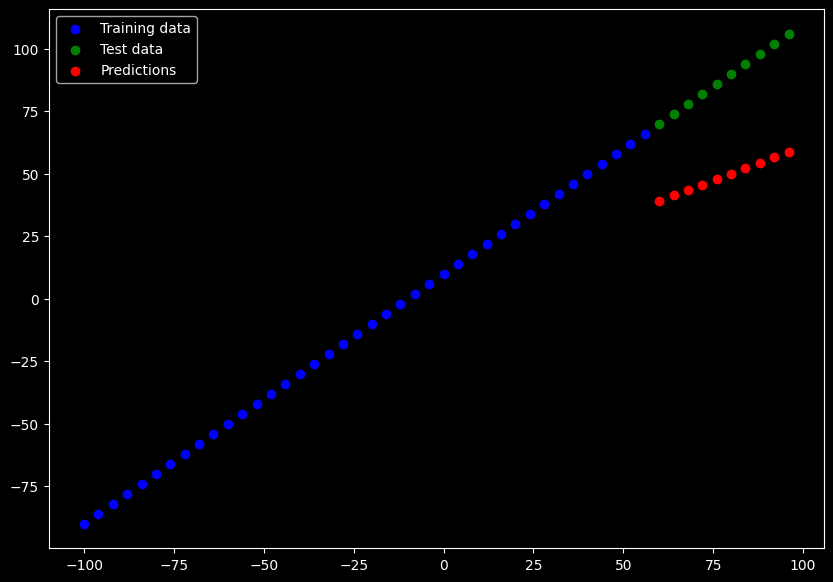

In [79]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions= y_pred_3)

🗝️ **Note** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

In [64]:
# Calculate model 3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=int32, numpy=34>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1191.617431640625>)

### Comparing the results of our experiments
We've run a few experiments, lets compare the results.

In [80]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_2_c", mae_2_c.numpy(), mse_2_c.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse" ])
all_results

,model,mae,mse
0,model_1,14,4.699203
1,model_2,14,86.974342
2,model_2_c,31,950.251831
3,model_3,34,1191.617432


In [14]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

> 🗝️ **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the
more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine
learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modeling id to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, tere are tools to helps us!

📖 **Resources:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - component of the TensorFlow library to help tracking modeling experiments (We'll se this one later).
* [weights & biases](https://wandb.ai/site/) - a tool for tracking all of kind of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google
Colab (or wherever they were trained) such as in a web
application or a mobile app.


There are two model formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [34]:
# Save model using the SavedModel format

model_2.export("best_model_sm")

INFO:tensorflow:Assets written to: best_model_sm\assets


INFO:tensorflow:Assets written to: best_model_sm\assets


Saved artifact at 'best_model_sm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1425304942160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1425304943120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1425304941584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1425304942352: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [32]:
# Save model using the HDF5 format
model_2.save("best_model.h5")